<a href="https://colab.research.google.com/github/AmishiR/ML-Lab/blob/main/ML_Lab_02_Linear_Regression_Lab_A_9_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 **<font color='blue'><b>Lab-02 Linear Regression**

Welcome to the **Linear Regression Lab**! In this lab exercise, you'll implement linear regression to predict value of target variable using one and multiple variables.

---

## 📖  **<font color='blue'><b>Part 0: Setup & Warm-up**

In this part, you'll import libraries, load data, and do a warm-up exercise.

In [ ]:
# =========== Setup ===============
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Enable better plots in notebooks
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

### ✅ Warm-Up Exercise

Run this cell to generate a 5x5 identity matrix. This is a simple way to check that your environment is set up correctly.

In [ ]:
# ========== Warm-up Exercise ==========

def warmUpExercise():
    """Returns a 5x5 Identity matrix"""
    A = np.eye(5)
    return A

# Run it
print("5x5 Identity Matrix:")
print(warmUpExercise())

5x5 Identity Matrix:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


---

## 📖  **<font color='blue'><b>Part 1: Linear Regression with One Variable**

In this section, you will implement linear regression to predict the profit of a food truck in a city.

### 📊 Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different citiesfor opening a new outlet.  The chain already has trucks in various cities and
you have data for **profit** and **population** from the cities. The data is in `ex2data1.csv`.

Your task is to fit a **univariate linear regression model** to predict profit based on population.

### 📈 Dataset Visualization

Let’s load and plot the dataset to understand the relationship.

In [ ]:
# ========== Load Dataset ==========
# TODO: Load ex2data1.csv for one variable linear regression
data = pd.read_csv("ex1data1.csv", header=None, names=["Population", "Profit"])
data.describe()
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
data.shape

(97, 2)

In [ ]:
# Verify any null value
data.isnull().sum()

,0
Population,0
Profit,0


In [ ]:
X =data.info("Population")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
X =data[['Population']]

In [ ]:
# seperate the fetaures and the target variable in X and y respectively
X =data[['Population']]
y =data[['Profit']]
m =y.size  # number of training examples

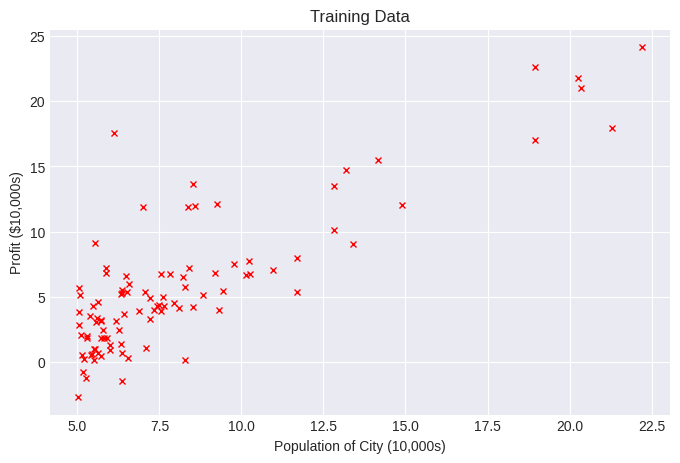

In [ ]:
# Visualize the data
plt.figure(figsize=(8,5))
plt.plot(X, y, 'rx', markersize=5)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.title('Training Data')
plt.show()

# Prepare the data for vectorized implemenation

In [ ]:
ones=np.ones(97)

In [ ]:
#Add intercept term to X and convert it into numpy array
#insert a column of ones at the zeroth index in the feature matrix X
X.insert(0,'ones',1)


In [ ]:
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [ ]:
X.shape

(97, 2)

In [ ]:
y.shape

(97, 1)

In [ ]:
# Initialize fitting parameters
theta=np.zeros((2,1))

In [ ]:
theta.shape

(2, 1)

In [ ]:
# Convert X, and y to numpy array
X = np.array(X)


In [ ]:
y = np.array(y)

---

## 🔢 Cost Function

The objective of linear regression is to minimize the cost function:
### Cost Function
$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

### Hypothesis Function
where  $$ \hat{y}^{(i)}=h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)} $$ is the hypothesis.

### ✏️ Exercise: compute_cost

Complete the function below to compute cost.

In [ ]:
# ========== TODO: Compute Cost ==========

def compute_cost(X, y, theta):
    """
    Compute cost for linear regression
    Arguments:
    X : feature matrix (m x 2)
    y : target vector (m x 1)
    theta : parameter vector (2 x 1)
    """
    m = len(y)
    cost = 0
    # ====================YOUR CODE HERE=========================

    cost = (1/(2*m))*np.sum((X@theta - y) ** 2)

    # ============================================================
    # Note: The cost is stored in J, not 'cost'. Update the return statement.
    return cost

In [ ]:
  y_predicted=X@theta
  y_predicted.shape

(97, 1)

In [ ]:
#  cost=(1/(2*m)) * np.sum((x@theta-y) ** 2)

**Below is a simple test cell to check your cost function. Run this to verify your output matches the expected value.**

In [ ]:
# === Test ===
# Test cost at initial theta
theta_test = np.zeros((2,1)) # Initialize as a NumPy array
cost = compute_cost(X, y, theta_test)
expected = 32.07  # Example expected cost value
# Check if the cost is a pandas Series and extract the value
if isinstance(cost, pd.Series):
    cost = cost.iloc[0] # Assuming the first element is the cost value
assert abs(cost - expected) < 1, f"Cost function error: {cost} != {expected}"
print('✅ Cost function test passed.')

✅ Cost function test passed.


---

## 🚀 Gradient Descent

You will now implement **gradient descent** to minimize the cost.

Each iteration performs:
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}
$$
### ✏️ Exercise: gradient_descent

Complete the gradient descent function below.

In [ ]:
# ========== TODO: Gradient Descent ==========
# === Gradient Descent ===
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent to learn theta
    """
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        # ====================== YOUR CODE HERE ======================
        # TODO: perform a single gradient step on the parameter vector theta
        theta = theta - (alpha / m) * X.T @ (X @ theta - y)
        #theta=(-alpha/m)*np.sum(Temp)

        # ============================================================
        # Store the cost in every iteration
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

### 🧪 Running Gradient Descent

We’ll now run our `gradient_descent()` function.

In [ ]:
# Gradient descent settings
iterations = 2000
alpha = 0.01   # Learning rate

# Run gradient descent
Theta1, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Print result
print("Theta found by gradient descent:", Theta1)
print(f'The optimized value of cost J(theta) is {compute_cost(X,y,Theta1)}')

Theta found by gradient descent: [[-3.78806857]
 [ 1.18221277]]
The optimized value of cost J(theta) is 4.47802760987997


### 📈 Plotting the Linear Fit

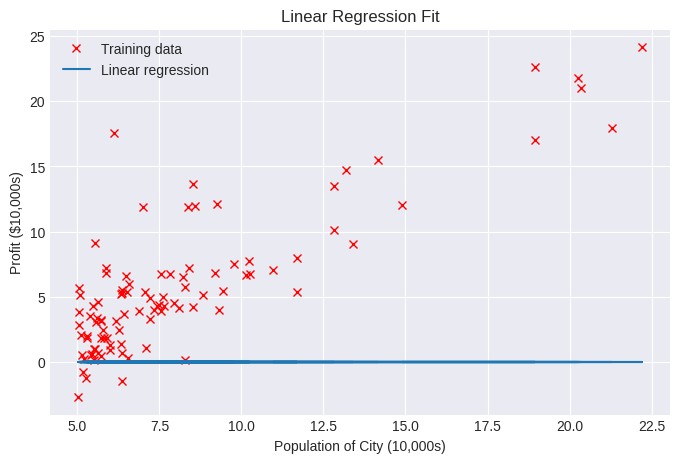

In [ ]:
# Plot the linear fit
plt.figure(figsize=(8,5))
plt.plot(X[:,1], y, 'rx', label='Training data')
plt.plot(X[:,1], X @ theta, '-', label='Linear regression')
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

### 📉 Plotting Cost vs. Iterations

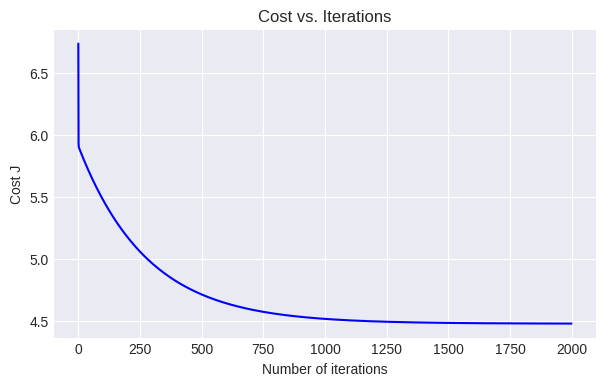

In [ ]:
# Plot the cost function history
plt.figure(figsize=(7,4))
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost vs. Iterations')
plt.show()

### 🔮 Prediction

Use the model to predict profits for populations of 35,000 and 70,000.

In [ ]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
predict2 = np.dot([1, 7.0], theta)
print(f"For population = 35,000, we predict a profit of ${predict1[0]*10000:.2f}")
print(f"For population = 70,000, we predict a profit of ${predict2[0]*10000:.2f}")

---
## 📖  **<font color='blue'><b>Part 2: Linear Regression with Multiple Variables**

In this part, you'll implement linear regression with more than one feature.

### 🏘️ Problem Statement

Predict the price of a house using the dataset `ex2data2.csv`, which contains:

- Size of the house (in square feet)
- Number of bedrooms
- Price of the house

### 📈 Load and Inspect Data

In [ ]:
# Load Data
data2 = pd.read_csv("ex1data2.csv", header=None, names=["Size", "Bedrooms", "Price"])

# Extract features and target
X_multi =
y_multi =
m_multi =

# Display first few rows of the data


---

### ⚖️ Feature Normalization

It’s important to scale features when using gradient descent with multiple variables.

Each feature is normalized as:

$$
x_i := \frac{x_i - \mu}{\sigma}
$$

### ✏️ Exercise: feature_normalize

Complete the function below to normalize features.

In [ ]:
# ========== TODO: Feature Normalization ==========
def feature_normalize(X):
    """Normalize features by subtracting mean and dividing by std dev"""
    # TODO: compute mean and std, normalize features
    mu =
    sigma =
    X_norm =
    # Add intercept term in X_norm


    return X_norm, mu, sigma

---

### 🔢 Cost Function (Multivariate)

Implement the vectorized cost function:

$$
J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)
$$

### ✏️ Exercise: compute_cost_multi

In [ ]:
# ========== TODO: Vectorized Cost Function ==========
def compute_cost_multi(X, y, theta):
    """Compute cost for linear regression with multiple variables"""
    m = y.size
    J = (1/(2*m)) * np.sum((X @ theta - y)**2)
    # TODO: compute cost using vectorized operations
    return J

---

### 🚀 Gradient Descent (Multivariate)

Now implement gradient descent using matrix operations:

$$
\theta := \theta - \frac{\alpha}{m} X^T (X\theta - y)
$$

### ✏️ Exercise: gradient_descent_multi

In [ ]:
# ========== TODO: Vectorized Gradient Descent ==========
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    """Performs gradient descent to learn theta with multiple variables"""
    m = y.size
    J_history = []

    for i in range(num_iters):
        error = X @ theta - y
        gradient = (1/m) * (X.T @ error)
        theta -= alpha * gradient
        cost = compute_cost_multi(X, y, theta)
        J_history.append(cost)

    return theta, J_history

---

### 🧪 Normalize, Train, and Plot

Run gradient descent using your normalized features and functions.

In [ ]:
# Normalize features using feature_normalize() function



In [ ]:
# Convert X, and y to numpy array
X_multi = np.array(  )
y_multi = np.array(  )

In [ ]:
# Initialize paraemters theta
theta_multi =


In [ ]:
#Verify  the shape of X_multi, y_multi and theta_multi using shape attribute



In [ ]:
# Initialize hyperparameters
alpha = 0.01
num_iters = 400

# Run gradient descent
theta_multi, J_history_multi = gradient_descent_multi(X_multi, y_multi, theta_multi, alpha, num_iters)

# Plot cost vs. iterations
plt.plot(range(len(J_history_multi)), J_history_multi, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.title('Cost vs. Iterations (Multivariate)')
plt.show()

---

### 🔮 Final Prediction

Estimate the price of a house with:

- 1650 sq-ft
- 3 bedrooms

In [ ]:
# Predict for a 1650 sq-ft, 3-bedroom house
test_features = np.array([1650, 3])
norm_features = (test_features - mu) / sigma
test_input = np.concatenate(([1], norm_features))

price = np.dot(test_input, theta_multi)
print(f"Predicted price of a 1650 sq-ft, 3 br house: ${price[0]:.2f}")

---

## **Final Note**

**Once all the cells above run without errors and your predictions match expectations, you're ready to submit!**

**Make sure you've completed all the `# TODO` blocks and verified outputs with the provided tests.** 🎉

---

## 🎉 **Congratulations! **🎉

You have successfully completed the implementation of:


*  ✅ Linear Regression with One Variable
*  ✅ Linear Regression with Multiple Variables
*  ✅ Feature Normalization
*  ✅ Vectorized Cost Function and Gradient Descent
*  ✅ Cost vs. Iteration Visualization
*  ✅ Real-world Predictions with your Model

This is a big step in your machine learning journey. 🚀
Keep up the great work and get ready to tackle even more exciting algorithms ahead!

💡 Tip: Review your plots, test results, and predictions to solidify your understanding.

See you in the next lab!
Happy codding!
